/Users/ykiyo/workspace/cifer10_learning/predict/predictor.py:13: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load(model_path, map_location=self.device)["model_state_

Model loaded successfully.
Files already downloaded and verified
torch.Size([1, 3, 32, 32])


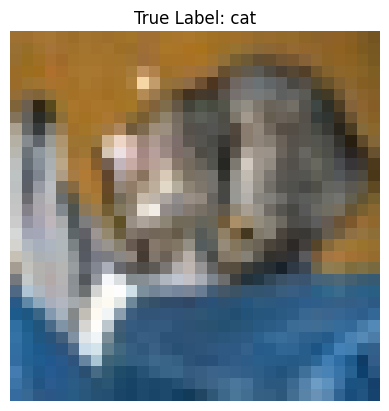

Predicted class, label: 3,cat
True class, label: 3, cat


In [1]:
# 必要なモジュールのインポート
import sys
import os

# プロジェクトルートを PYTHONPATH に追加
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.append(project_root)

import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from predict.predictor import Predictor
from predict.preprocess import preprocess_image
from data.dataloader import get_cifer10_testloader

# モデルのロード
model_path = os.path.join(project_root, "checkpoints/checkpoint.pt")
predictor = Predictor(model_path=model_path)
print("Model loaded successfully.")

# CIFAR-10 クラスラベル
CIFAR10_CLASSES = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
]

dataloader = get_cifer10_testloader(batch=1, num_workers=0)

# サンプル画像を取得
sampleindex = 0
data_iter = iter(dataloader)  # データローダーからイテレータを作成
images, labels = next(data_iter)  # 最初のバッチを取得
image, label = images[sampleindex], labels[sampleindex]  # バッチから1つの画像とラベルを取得
# 推論
predicted_class = predictor.predict(image)
predicted_label = CIFAR10_CLASSES[predicted_class]

# 入力画像の表示
plt.imshow(image.permute(1, 2, 0))  # (C, H, W) -> (H, W, C) に変換して表示
plt.axis("off")
plt.title(f"True Label: {CIFAR10_CLASSES[label]}")
plt.show()

# 推論結果の表示
print(f"Predicted class, label: {predicted_class},{predicted_label}")
print(f"True class, label: {label}, {CIFAR10_CLASSES[label]}")